In [2]:
import numpy as np
from numpy import linalg as la
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(rc={'axes.facecolor':'#F5F5F5'})

%matplotlib inline

In [3]:
ds = np.loadtxt('Dataset/Anscombe/data_set.txt')
ds1 = np.array((ds[:,0], ds[:,1]))
ds2 = np.array((ds[:,2], ds[:,3]))
ds3 = np.array((ds[:,4], ds[:,5]))
ds4 = np.array((ds[:,6], ds[:,7]))

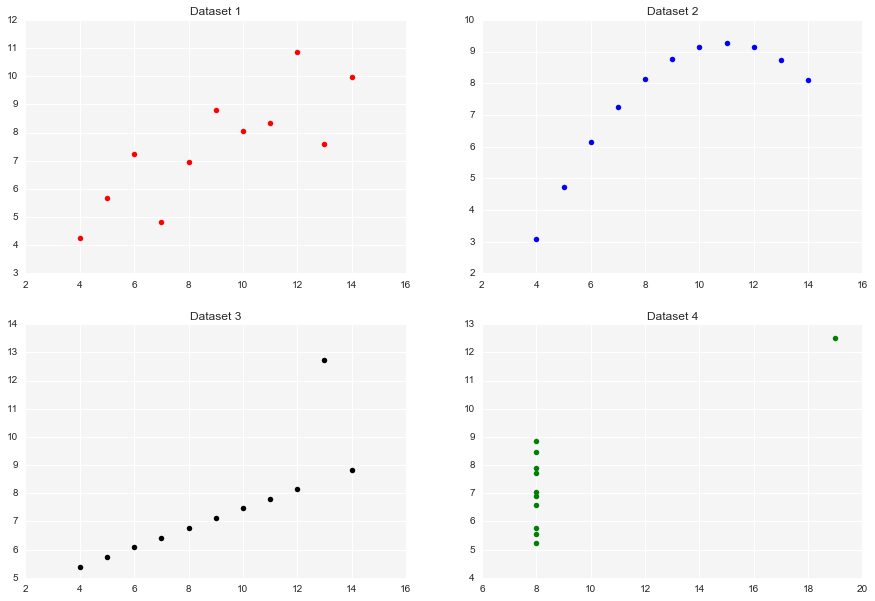

In [4]:
f, axarr = plt.subplots(2, 2, figsize=(15,10))
axarr[0, 0].scatter(ds1[0], ds1[1], c = 'r', s = 30, lw = 0)
axarr[0, 0].set_title('Dataset 1')
axarr[0, 1].scatter(ds2[0], ds2[1], c = 'b', s = 30, lw = 0)
axarr[0, 1].set_title('Dataset 2')
axarr[1, 0].scatter(ds3[0], ds3[1], c = 'k', s = 30, lw = 0)
axarr[1, 0].set_title('Dataset 3')
axarr[1, 1].scatter(ds4[0], ds4[1], c = 'g', s = 30, lw = 0)
axarr[1, 1].set_title('Dataset 4')

f.subplots_adjust(hspace = 0.2);

# 1. Least squares approach

In [5]:
def ls(x):
    return 0.5*x**2



def least_squares(x, y, data):
    ones = np.ones((11, 1))
    
    if not x.shape == (11, 1):
        x = x.reshape(11, 1)
        
    A = np.hstack([x, ones])
    
    if not y.shape == (11, 1):
        y = y.reshape(11,1)
        
    b = np.dot(la.inv(np.dot(A.T, A)), np.dot(A.T, y))
    
    yhat = np.dot(A, b)
    
    plt.figure(figsize = [10, 7])
    plt.title('Dataset %d' %data)
    plt.scatter(x, y, c = 'r', s = 30, lw = 0)
    plt.plot(x, yhat, color = 'gray', linestyle = 'dashed', lw = 0.5)
    
    print 'Result: %.2f + %.2f*x' %(b[0], b[1])
    print error(b, ds)

In [6]:
def least_squares(ds, title):
    ones = np.ones((11, 1))
    
    x = ds[0].reshape(11,1)  
    y = ds[1].reshape(11,1)
    
    A = np.hstack([x, ones])
        
    b = np.dot(la.inv(np.dot(A.T, A)), np.dot(A.T, y))
    
    predicted = np.dot(A, b)
    
    plt.figure(figsize = [10, 7])
    plt.title('Dataset %d' %title)
    plt.scatter(x, y, c = 'r', s = 30, lw = 0)
    plt.plot(ds[0], predicted, color = 'gray', linestyle = 'dashed', lw = 0.5)
    
    print 'Result: %.2f + %.2f*x' %(b[0], b[1])
    print 'Error:', sum(abs(predicted - y))

Result: 0.50 + 3.00*x
Error: [ 9.21145455]


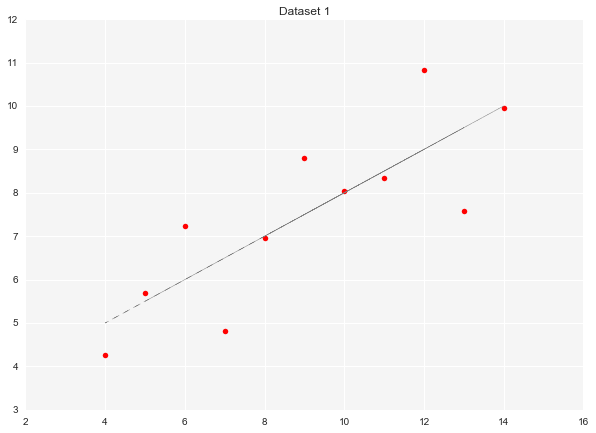

In [7]:
least_squares(ds1, 1)

Result: 0.50 + 3.00*x
Error: [ 10.64727273]


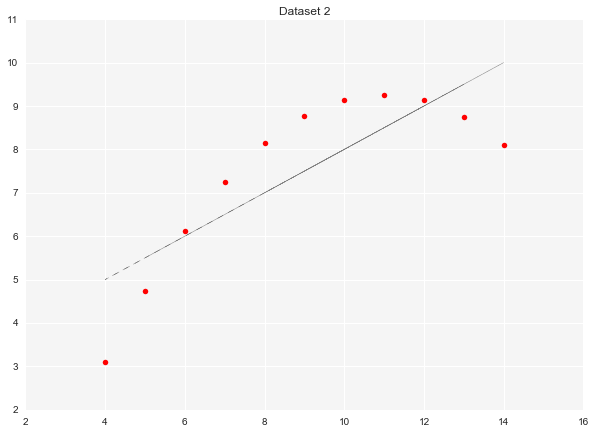

In [8]:
least_squares(ds2, 2)

Result: 0.50 + 3.00*x
Error: [ 7.87563636]


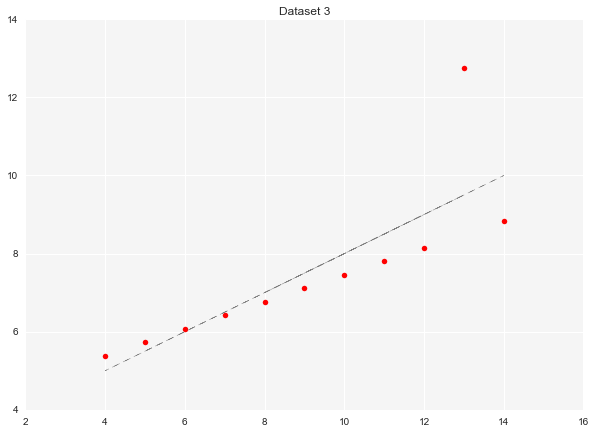

In [9]:
least_squares(ds3, 3)

Result: 0.50 + 3.00*x
Error: [ 9.93]


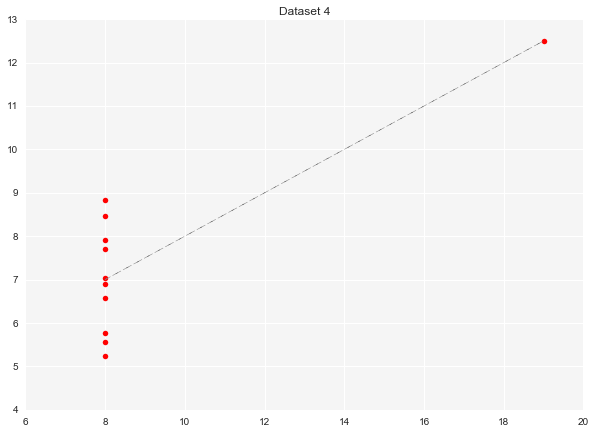

In [10]:
least_squares(ds4, 4)

<div class = "alert alert-info" style ="border-radius:10px;border-width:3px"><b>In this part,</b> we used the least squares method to find a linear approximation of the observed data (Anscombe’s dataset). This dataset consists of 4 parts, each of which has identical simple statistical properties, but consist of very different data points. When approximating these sets using the least squares method, it is interesting to note that the linear functions for all the subsets turn out to be the same: $y = 0.5 + 3*x$.<br><br>
The main disadvantage of the least squares method is its lack of robustness in terms of outliers (see Dataset 3 and 4), since it treats all the deviations from the line equally and sets a big penalty for any point far away. 

</div>

# 2. Robust function

### 2.1. Huber function

In [11]:
def ls(x):
    return 0.5*x**2

def huber(x):
    return (np.abs(x) <= 1)*0.5*x**2 + (np.abs(x) > 1)*(np.abs(x) - .5)

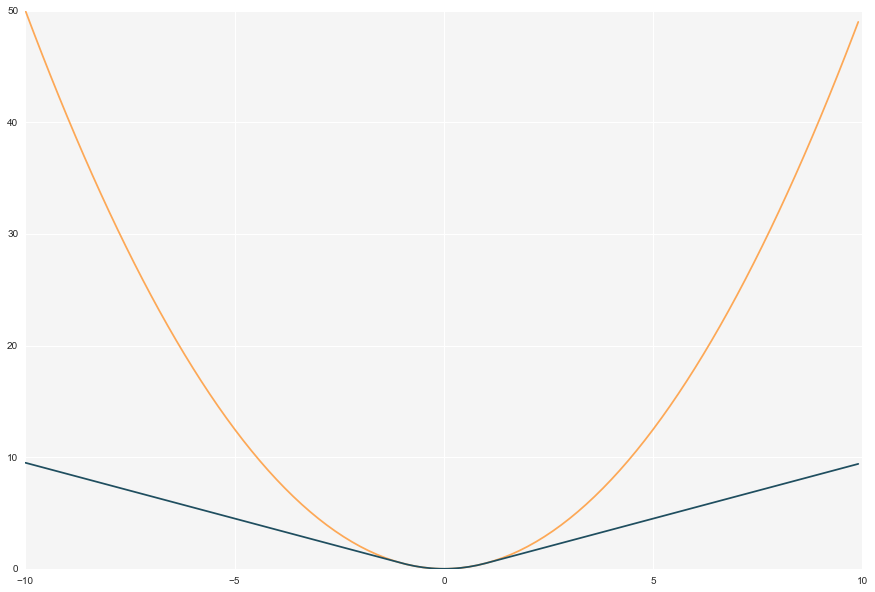

In [12]:
x = np.arange(-10, 10, 0.1)

plt.figure(figsize = [15, 10])
plt.plot(x, ls(x), c = '#FDA856', )
plt.plot(x, huber(x), c = '#1F4E5F');

<div class = "alert alert-info" style ="border-radius:10px;border-width:3px">Using the Huber function as the error function helps treating large deviations from the approximation less radically. Thus, this method is more resistant to outliers.
</div>

In [29]:
def error(b, ds):
    e = b[0] + b[1]*ds[0] - ds[1]
    return huber(e)
    
def grad(b, ds):
    e = b[0] + b[1]*ds[0] - ds[1]
    q_b0 = np.sum((np.abs(e) <= 1)*e + (np.abs(e) > 1)*np.sign(e))
    q_b1 = np.sum((np.abs(e) <= 1)*(e)*ds[0] + (np.abs(e) > 1)*np.sign(e)*ds[0])
    return np.array((q_b0, q_b1))

def grad_descent(ds, title):
    b_0 = np.zeros((2))
    attempts = 0
    alpha = .1
    count = 0
    
    plt.figure(figsize = [10, 7])
    plt.title(title)
    plt.scatter(ds[0], ds[1], c = 'r', s = 30, lw = 0)
    plt.xlim([min(ds[0]) - 0.5, max(ds[0]) + 0.5])
    
    for iteration in range(1000):
        if alpha > 1e-5:
            attempts += 1
            d = grad(b_0, ds)
            b = b_0 - alpha*d
            if np.sum(error(b_0, ds)) > np.sum(error(b, ds)):
                b_0 = b
                yhat = b[0] + ds[0]*b[1]
                plt.plot(ds[0], yhat, color = '#8C999A', linestyle = 'dashed', alpha = 0.1)
                alpha = 1.
                count += 1
            else:
                alpha = alpha/2.
                
    print sum(error(b_0, ds))
    predicted = b_0[0] + ds[0]*b_0[1]
    plt.plot(ds[0], predicted, color = '#343434', alpha = 1, lw = 1)
    
    print 'Number of attempts constituted %d' % attempts
    print 'Number of iterations constituted %d' % count
    print 'Result: %.2f + %.2f*x' % (b_0[0], b_0[1])
    print 'Abs error sum:', sum(abs(predicted - ds[1]))

7.17643309321
Number of attempts constituted 1000
Number of iterations constituted 115
Result: 1.13 + 0.70*x
Abs error sum: 11.5986823329


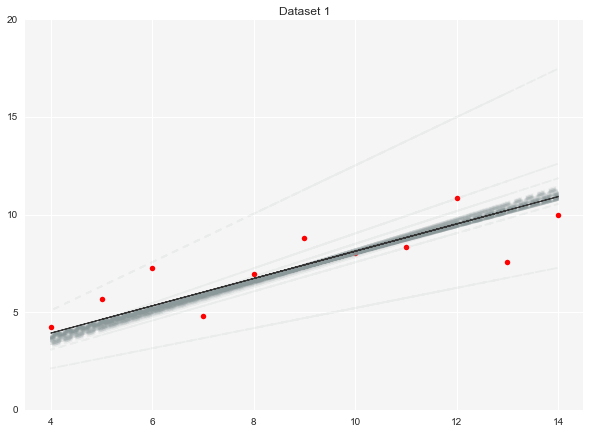

In [30]:
grad_descent(ds1, 'Dataset 1')

7.25363854367
Number of attempts constituted 1000
Number of iterations constituted 115
Result: 0.97 + 0.74*x
Abs error sum: 11.7995943884


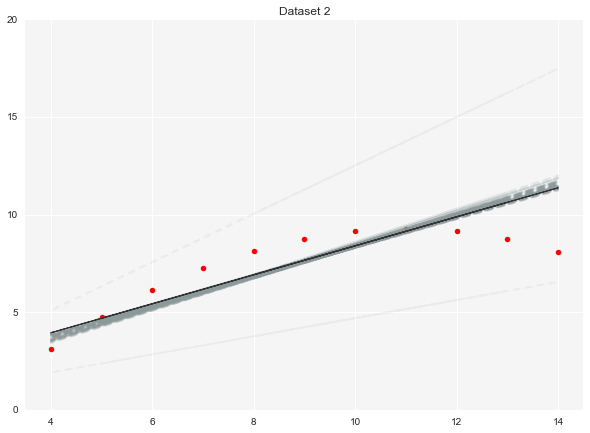

In [31]:
grad_descent(ds2, 'Dataset 2')

6.61020674898
Number of attempts constituted 1000
Number of iterations constituted 114
Result: 1.26 + 0.64*x
Abs error sum: 10.9862946445


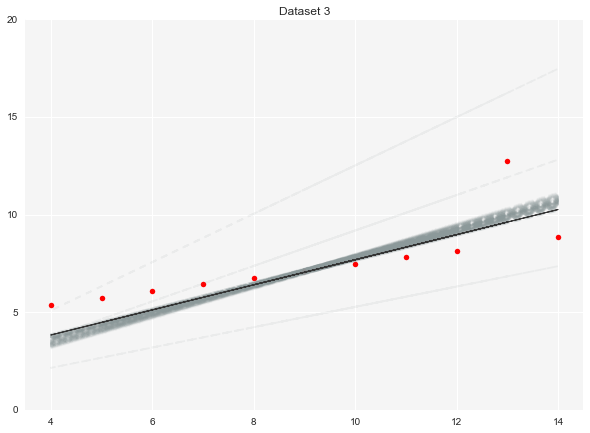

In [32]:
grad_descent(ds3, 'Dataset 3')

7.03014364059
Number of attempts constituted 1000
Number of iterations constituted 122
Result: 1.48 + 0.62*x
Abs error sum: 11.8014258669


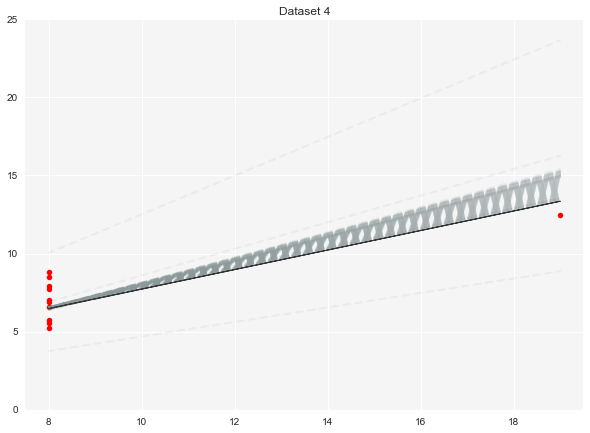

In [33]:
grad_descent(ds4, 'Dataset 4')

<div class = "alert alert-info" style ="border-radius:10px;border-width:3px">Using the Huber function as the error function performs well overall, works better with outliers (Dataset 3), but is nonetheless not able to give the right approximation for Dataset 4.
</div>

### 2.2. Cauchy function

In [80]:
def ls(x):
    return 0.5*x**2

def huber(x):
    return (np.abs(x) <= 1)*0.5*x**2 + (np.abs(x) > 1)*(np.abs(x) - .5)

def cauchy(x):
    return 1/2.*np.log(1 + x**2)

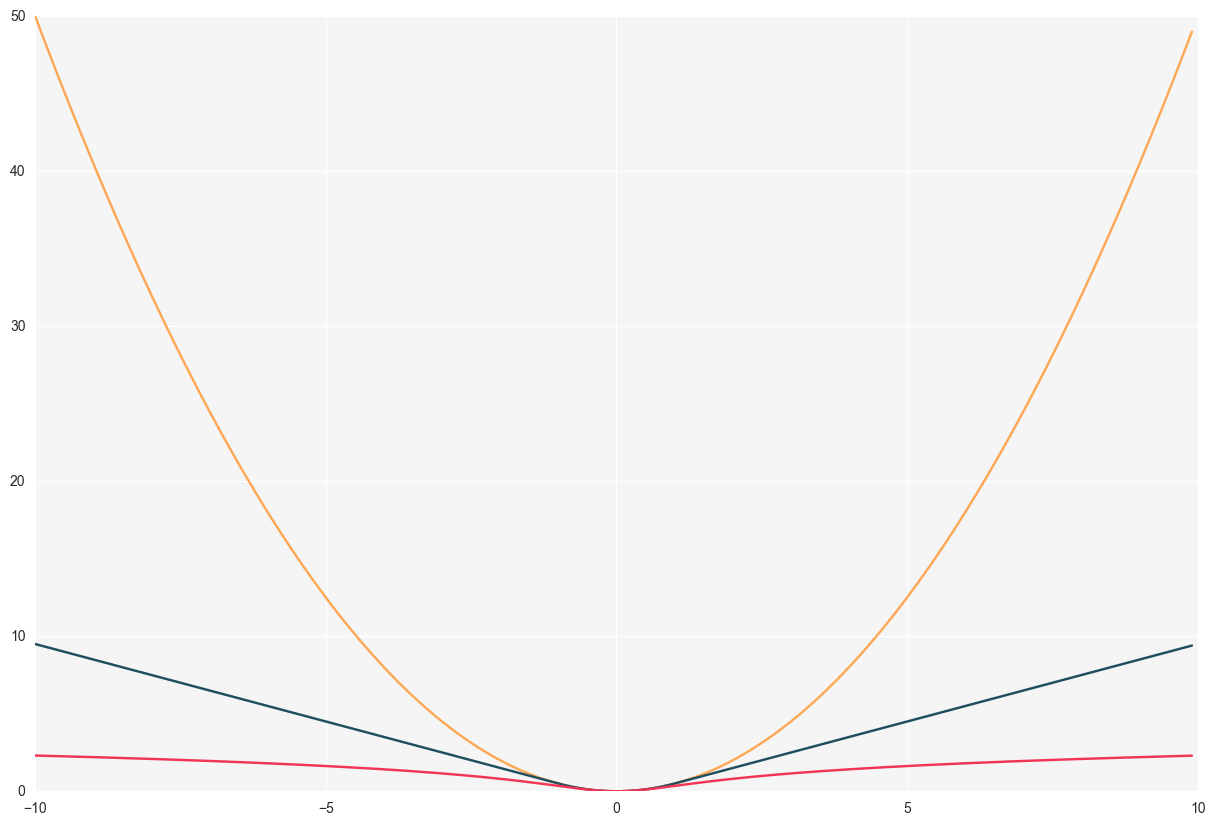

In [81]:
x = np.arange(-10, 10, 0.1)

plt.figure(figsize = [15, 10])
plt.plot(x, ls(x), c = '#FDA856', )
plt.plot(x, huber(x), c = '#1F4E5F')
plt.plot(x, cauchy(x), c = '#F23557');

<div class = "alert alert-info" style ="border-radius:10px;border-width:3px">Using Cauchy function as the error function is even less radical than Huber function and, therefore, less prone to a bias towards outliers.
</div>

In [34]:
def error(b, ds):
    e = b[0] + b[1]*ds[0] - ds[1]
    return cauchy(e)
    
def grad(b, ds):
    e = b[0] + b[1]*ds[0] - ds[1]
    q_b0 = np.sum(e/(1 + e**2))
    q_b1 = np.sum(ds[0]*e/(1 + e**2))
    return np.array((q_b0, q_b1))

print grad([1,0],ds1)



def grad_descent(ds, title):
    b_0 = np.zeros((2))
    attempts = 0
    alpha = .1
    count = 0
    
    plt.figure(figsize = [10, 7])
    plt.title(title)
    plt.scatter(ds[0], ds[1], c = 'r', s = 30, lw = 0)
    plt.xlim([min(ds[0]) - 0.5, max(ds[0]) + 0.5])
    
    for iteration in range(1000):
        if alpha > 1e-5:
            attempts += 1
            d = grad(b_0, ds)
            b = b_0 - alpha*d
            if np.sum(error(b_0, ds)) > np.sum(error(b, ds)):
                b_0 = b
                yhat = b[0] + ds[0]*b[1]
                plt.plot(ds[0], yhat, color = '#8C999A', linestyle = 'dashed', alpha = 0.1)
                alpha = 1.
                count += 1
            else:
                alpha = alpha/2.
                
    predicted = b_0[0] + ds[0]*b_0[1]
    plt.plot(ds[0], predicted, color = '#343434', alpha = 1, lw = 1)
    
    print 'Number of attempts constituted %d' % attempts
    print 'Number of iterations constituted %d' % count
    print 'Result: %.2f + %.2f*x' % (b_0[0], b_0[1])
    print 'Error:', sum(abs(predicted - ds[1]))

[ -1.80790868 -14.78400857]


Number of attempts constituted 1000
Number of iterations constituted 134
Result: 1.46 + 0.65*x
Error: 10.8965014218


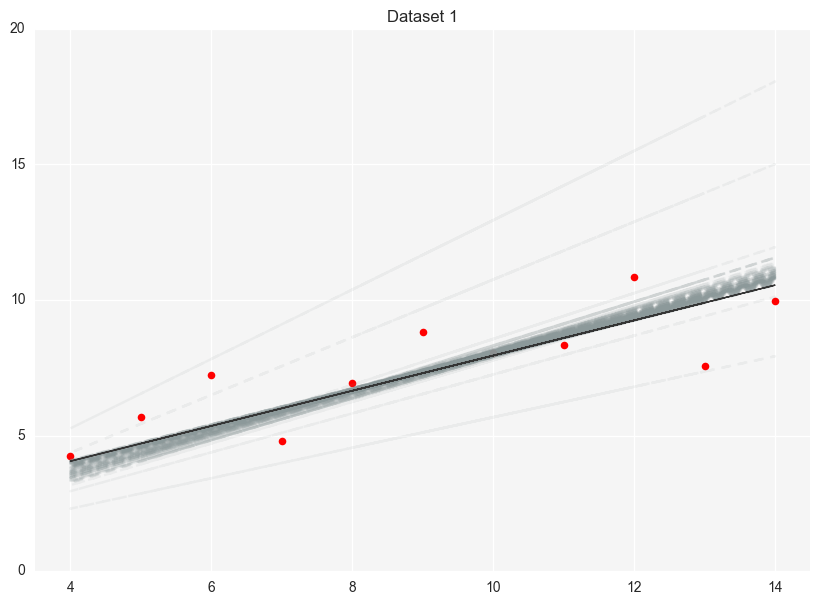

In [83]:
grad_descent(ds1, 'Dataset 1')

Number of attempts constituted 1000
Number of iterations constituted 138
Result: 1.33 + 0.73*x
Error: 11.5667385263


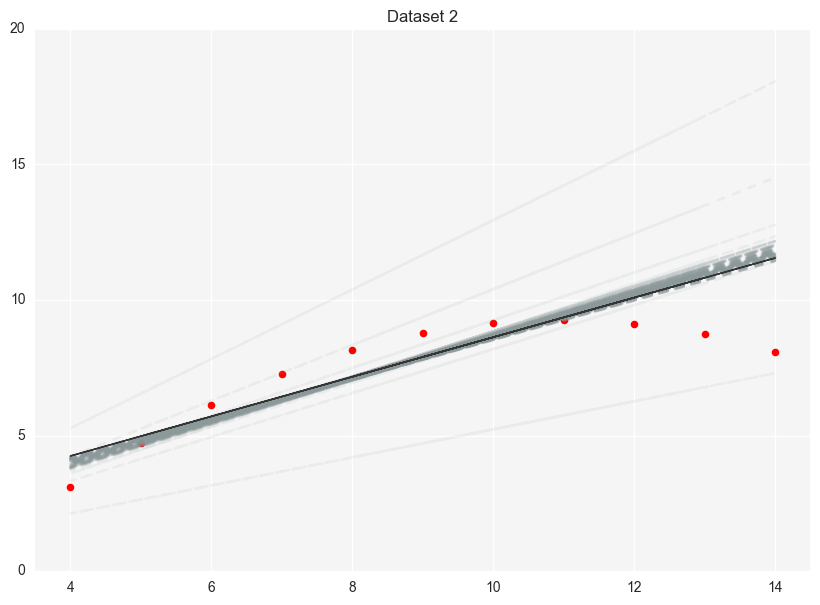

In [84]:
grad_descent(ds2, 'Dataset 2')

Number of attempts constituted 1000
Number of iterations constituted 130
Result: 1.59 + 0.59*x
Error: 10.2430844626


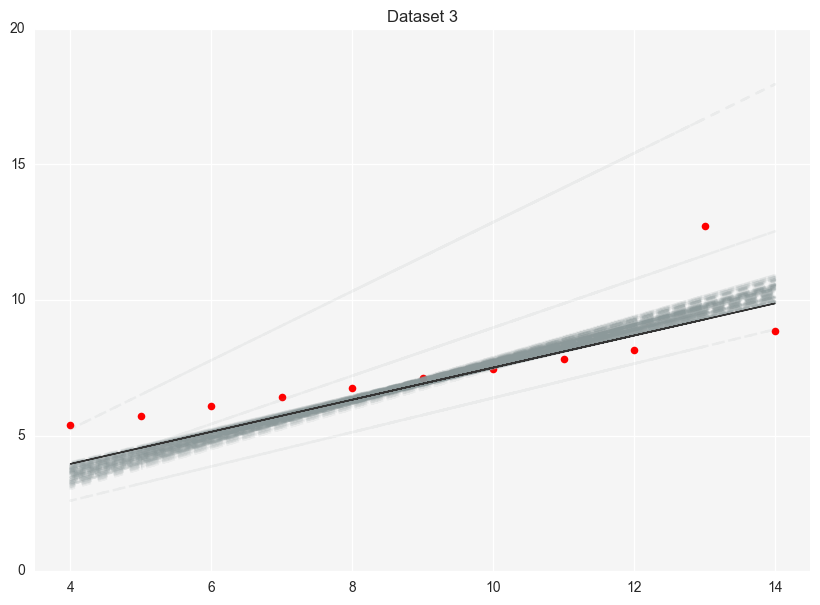

In [85]:
grad_descent(ds3, 'Dataset 3')

Number of attempts constituted 1000
Number of iterations constituted 147
Result: 1.77 + 0.60*x
Error: 11.2797034225


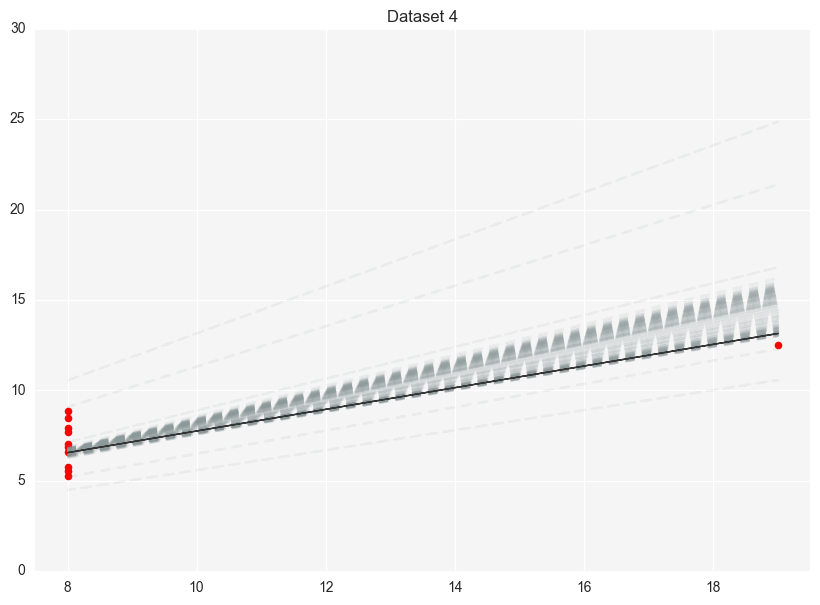

In [86]:
grad_descent(ds4, 'Dataset 4')

<div class = "alert alert-info" style ="border-radius:10px;border-width:3px">The Cauchy function as the error function is more robust than Huber function, nonetheless it is still by far not good enough to approximate correctly Dataset 4.
</div>